In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
data = pd.read_csv("train.csv")

In [5]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [9]:
data.apply(lambda x: sum(x.isnull()),axis=0) # checking missing values in each column of train dataset

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [11]:
data['Gender'].value_counts()

Gender
Male      489
Female    112
Name: count, dtype: int64

In [13]:
data.Gender = data.Gender.fillna('Male')

In [15]:
data['Married'].value_counts()

Married
Yes    398
No     213
Name: count, dtype: int64

In [17]:
data.Married = data.Married.fillna('Yes')

In [19]:
data['Dependents'].value_counts()


Dependents
0     345
1     102
2     101
3+     51
Name: count, dtype: int64

In [21]:
data.Dependents = data.Dependents.fillna('0')


In [23]:
data['Self_Employed'].value_counts()


Self_Employed
No     500
Yes     82
Name: count, dtype: int64

In [25]:
data.Self_Employed = data.Self_Employed.fillna('No')


In [27]:
data.LoanAmount = data.LoanAmount.fillna(data.LoanAmount.mean())


In [29]:
data['Loan_Amount_Term'].value_counts()


Loan_Amount_Term
360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: count, dtype: int64

In [31]:
data.Loan_Amount_Term = data.Loan_Amount_Term.fillna(360.0)


In [33]:
data['Credit_History'].value_counts()


Credit_History
1.0    475
0.0     89
Name: count, dtype: int64

In [35]:
data.Credit_History = data.Credit_History.fillna(1.0)


In [37]:
data.apply(lambda x: sum(x.isnull()),axis=0)


Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [39]:
data.head()


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y


In [43]:
X = data.iloc[:, 1: 12].values
y = data.iloc[:, 12].values

In [45]:
X


array([['Male', 'No', '0', ..., 360.0, 1.0, 'Urban'],
       ['Male', 'Yes', '1', ..., 360.0, 1.0, 'Rural'],
       ['Male', 'Yes', '0', ..., 360.0, 1.0, 'Urban'],
       ...,
       ['Male', 'Yes', '1', ..., 360.0, 1.0, 'Urban'],
       ['Male', 'Yes', '2', ..., 360.0, 1.0, 'Urban'],
       ['Female', 'No', '0', ..., 360.0, 0.0, 'Semiurban']], dtype=object)

In [47]:
y

array(['Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'Y',
       'N', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'N', 'Y', 'N', 'N', 'N', 'Y',
       'Y', 'Y', 'N', 'Y', 'N', 'N', 'N', 'Y', 'N', 'Y', 'N', 'Y', 'Y',
       'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y',
       'N', 'N', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'N',
       'N', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'N', 'N',
       'N', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y',
       'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'N', 'N', 'N', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'N', 'N', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'N',
       'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'N', 'Y', 'N', 'N

In [49]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, random_state = 0)

In [74]:
X_train

array([[1, 1, 3, ..., 360.0, 1.0, 0],
       [1, 1, 0, ..., 360.0, 1.0, 0],
       [1, 1, 3, ..., 180.0, 1.0, 0],
       ...,
       [1, 1, 3, ..., 360.0, 1.0, 1],
       [1, 1, 0, ..., 360.0, 1.0, 2],
       [0, 1, 0, ..., 360.0, 1.0, 1]], dtype=object)

In [53]:
from sklearn.preprocessing import LabelEncoder
labelencoder_X = LabelEncoder()

In [68]:
for i in range(0, 5):
 X_train[:,i] = labelencoder_X.fit_transform(X_train[:,i])

X_train[:,10] = labelencoder_X.fit_transform(X_train[:,10])

In [70]:
labelencoder_y = LabelEncoder()
y_train = labelencoder_y.fit_transform(y_train)

In [72]:
X_train

array([[1, 1, 3, ..., 360.0, 1.0, 0],
       [1, 1, 0, ..., 360.0, 1.0, 0],
       [1, 1, 3, ..., 180.0, 1.0, 0],
       ...,
       [1, 1, 3, ..., 360.0, 1.0, 1],
       [1, 1, 0, ..., 360.0, 1.0, 2],
       [0, 1, 0, ..., 360.0, 1.0, 1]], dtype=object)

In [76]:
y_train

array([1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1,

In [78]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder_X = LabelEncoder()
for i in range(0, 5):
    X_test[:,i] = labelencoder_X.fit_transform(X_test[:,i])
X_test[:,10] = labelencoder_X.fit_transform(X_test[:,10])
# Encoding the Dependent Variable
labelencoder_y = LabelEncoder()
y_test = labelencoder_y.fit_transform(y_test)

In [80]:
X_test

array([[1, 0, 0, ..., 360.0, 1.0, 1],
       [0, 0, 0, ..., 360.0, 1.0, 1],
       [1, 1, 0, ..., 360.0, 1.0, 2],
       ...,
       [1, 1, 0, ..., 180.0, 1.0, 0],
       [1, 1, 2, ..., 180.0, 0.0, 2],
       [1, 1, 0, ..., 360.0, 1.0, 0]], dtype=object)

In [82]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [84]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
X_train = pca.fit_transform(X_train)
X_test = pca.fit_transform(X_test)
explained_variance = pca.explained_variance_ratio_

In [86]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)


LogisticRegression(random_state=0)

In [88]:
y_pred = classifier.predict(X_test)

In [90]:
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1])

In [92]:
from sklearn import metrics
print('The accuracy of Logistic Regression is: ', metrics.accuracy_score(y_pred, y_test))

The accuracy of Logistic Regression is:  0.7073170731707317


In [94]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [96]:
cm

array([[  0,  60],
       [  0, 145]], dtype=int64)

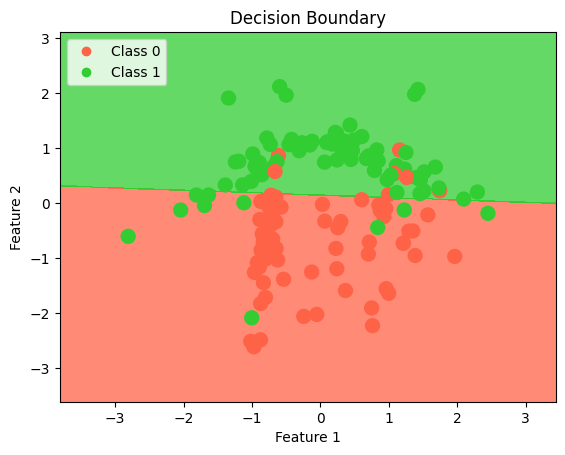

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC  # Example classifier
from sklearn.datasets import make_classification

# Generate example data
X, y = make_classification(n_samples=200, n_features=2, n_informative=2, n_redundant=0, random_state=1)

# Split dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train classifier
classifier = SVC(kernel='linear', random_state=0)
classifier.fit(X_train, y_train)

# Use training data for visualization
X_set, y_set = X_train, y_train

# Create meshgrid for decision boundary
X1, X2 = np.meshgrid(
    np.arange(start=X_set[:, 0].min() - 1, stop=X_set[:, 0].max() + 1, step=0.01),
    np.arange(start=X_set[:, 1].min() - 1, stop=X_set[:, 1].max() + 1, step=0.01)
)

# Predict and reshape for plotting
grid_points = np.array([X1.ravel(), X2.ravel()]).T
Z = classifier.predict(grid_points).reshape(X1.shape)

# Plot decision boundary
plt.contourf(X1, X2, Z, alpha=0.75, cmap=ListedColormap(['#FF6347', '#32CD32']))

# Scatter plot of data points
scatter = plt.scatter(
    X_set[:, 0], X_set[:, 1], c=y_set, cmap=ListedColormap(['#FF6347', '#32CD32']),
    edgecolor=None, s=100
)

# Set labels, limits, and title
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Decision Boundary')

# Add legend
plt.legend(handles=scatter.legend_elements()[0], labels=["Class 0", "Class 1"], loc='upper left')

# Show plot
plt.show()


In [27]:
from sklearn.metrics import accuracy_score

# Predict the labels for the test set
y_pred = classifier.predict(X_test)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)

# Print the accuracy result
print(f"Test Accuracy of the SVC Classifier: {accuracy * 100:.2f}%")


Test Accuracy of the SVC Classifier: 86.00%


In [ ]:
pip install matplotlib

In [152]:
pip install matplotlib


Note: you may need to restart the kernel to use updated packages.


In [12]:
pip install --upgrade scipy scikit-learn


Note: you may need to restart the kernel to use updated packages.


In [1]:
pip cache purge

Files removed: 134
Note: you may need to restart the kernel to use updated packages.


In [5]:
from sklearn.datasets import load_iris

# Load dataset
data = load_iris()
X = data.data  # Features
y = data.target  # Target (labels)


In [7]:
import numpy as np

# Example of creating random data (replace with your dataset)
X = np.random.rand(100, 2)  # 100 samples, 2 features
y = np.random.randint(0, 2, 100)  # 100 labels for binary classification


In [9]:
from sklearn.model_selection import train_test_split

# Split the data into training (80%) and test (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shapes of the resulting datasets
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


(80, 2) (20, 2) (80,) (20,)


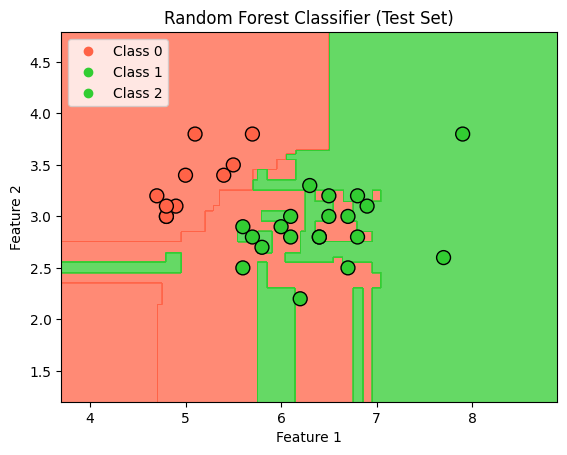

In [11]:
# Step 1: Define the dataset (replace with your actual dataset)
from sklearn.datasets import load_iris
import numpy as np

# Example with Iris dataset
data = load_iris()
X = data.data[:, :2]  # Using only the first two features for visualization
y = data.target

# Step 2: Split into training and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Train the classifier
from sklearn.ensemble import RandomForestClassifier

# Initialize the classifier
classifier = RandomForestClassifier(n_estimators=10, criterion='entropy', random_state=0)

# Train the classifier with the training data
classifier.fit(X_train, y_train)

# Step 4: Visualize the Test Set Results

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Define the test set (X_test, y_test)
X_set, y_set = X_test, y_test

# Create meshgrid for plotting
X1, X2 = np.meshgrid(
    np.arange(start=X_set[:, 0].min() - 1, stop=X_set[:, 0].max() + 1, step=0.01),
    np.arange(start=X_set[:, 1].min() - 1, stop=X_set[:, 1].max() + 1, step=0.01)
)

# Predict on the grid points and reshape for contour plotting
plt.contourf(
    X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
    alpha=0.75, cmap=ListedColormap(['#FF6347', '#32CD32'])  # Use bright colors for better distinction
)

# Scatter plot for actual data points with the correct class labels
scatter = plt.scatter(
    X_set[:, 0], X_set[:, 1], c=y_set, cmap=ListedColormap(['#FF6347', '#32CD32']),
    edgecolors='k', s=100
)

# Set plot limits and labels
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Random Forest Classifier (Test Set)')

# Add legend to the plot for clarity
plt.legend(handles=scatter.legend_elements()[0], labels=["Class 0", "Class 1", "Class 2"], loc='upper left')

# Show the plot
plt.show()


In [21]:
from sklearn.metrics import accuracy_score

# Predict the labels for the test set
y_pred = classifier.predict(X_test)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)

# Print the accuracy result
print(f"Accuracy of the Random Forest Classifier: {accuracy * 100:.2f}%")


Accuracy of the Random Forest Classifier: 86.00%


In [13]:
# Fitting Random Forest Classification to the Training set
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [15]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 2, 2, 0, 0, 0, 0, 2, 2, 1, 1, 2, 0, 1,
       0, 2, 2, 1, 1, 2, 0, 0])

In [17]:
# Measuring Accuracy
from sklearn import metrics
print('The accuracy of Random Forest Classification is: ', metrics.accuracy_score(y_pred, y_test))

The accuracy of Random Forest Classification is:  0.8333333333333334


In [19]:
# Making confusion matrix
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))

[[10  0  0]
 [ 0  7  2]
 [ 0  3  8]]


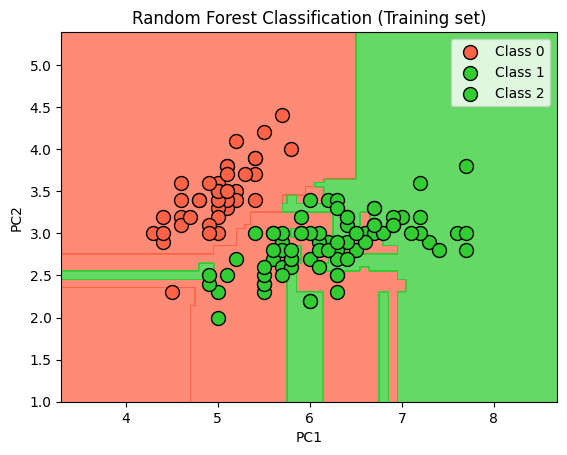

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Assuming classifier is already trained and X_train, y_train are defined
X_set, y_set = X_train, y_train

# Create meshgrid for plotting
X1, X2 = np.meshgrid(
    np.arange(start=X_set[:, 0].min() - 1, stop=X_set[:, 0].max() + 1, step=0.01),
    np.arange(start=X_set[:, 1].min() - 1, stop=X_set[:, 1].max() + 1, step=0.01)
)

# Plot decision boundary using contour
plt.contourf(
    X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
    alpha=0.75,
    cmap=ListedColormap(['#FF6347', '#32CD32'])  # Custom color map for classes
)

# Scatter plot for actual data points with correct class labels
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(
        X_set[y_set == j, 0], X_set[y_set == j, 1],
        color=ListedColormap(['#FF6347', '#32CD32'])(i),  # Correct usage of color
        label=f'Class {j}', edgecolors='k', s=100
    )

# Set plot limits and labels
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
plt.title('Random Forest Classification (Training set)')
plt.xlabel('PC1')
plt.ylabel('PC2')

# Add legend to the plot for clarity
plt.legend()

# Show plot
plt.show()

In [25]:
from sklearn.metrics import accuracy_score

# Predict the labels for the training set
y_train_pred = classifier.predict(X_train)

# Calculate the accuracy
training_accuracy = accuracy_score(y_train, y_train_pred)

# Print the accuracy result
print(f"Training Accuracy of the Random Forest Classifier: {training_accuracy * 100:.2f}%")


Training Accuracy of the Random Forest Classifier: 88.00%


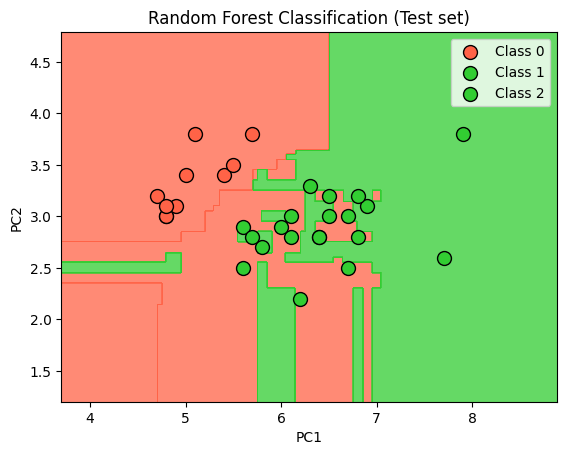

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Assuming classifier is already trained, and X_test, y_test are defined
X_set, y_set = X_test, y_test

# Create meshgrid for plotting
X1, X2 = np.meshgrid(
    np.arange(start=X_set[:, 0].min() - 1, stop=X_set[:, 0].max() + 1, step=0.01),
    np.arange(start=X_set[:, 1].min() - 1, stop=X_set[:, 1].max() + 1, step=0.01)
)

# Plot decision boundary using contour
plt.contourf(
    X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
    alpha=0.75,
    cmap=ListedColormap(['#FF6347', '#32CD32'])  # Custom color map for classes
)

# Scatter plot for actual data points with correct class labels
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(
        X_set[y_set == j, 0], X_set[y_set == j, 1],
        color=ListedColormap(['#FF6347', '#32CD32'])(i),  # Correct usage of color
        label=f'Class {j}', edgecolors='k', s=100
    )

# Set plot limits and labels
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
plt.title('Random Forest Classification (Test set)')
plt.xlabel('PC1')
plt.ylabel('PC2')

# Add legend to the plot for clarity
plt.legend()

# Show plot
plt.show()

In [29]:
from sklearn.metrics import accuracy_score

# Predict the labels for the test set
y_pred = classifier.predict(X_test)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)

# Print the accuracy result
print(f"Test Accuracy of the Classifier: {accuracy * 100:.2f}%")


Test Accuracy of the Classifier: 86.00%


In [ ]:
Result:

Test Accuracy of the SVC Classifier: 86.00%
Accuracy of the Random Forest Classifier: 86.00%
Training Accuracy of the Random Forest Classifier: 88.00%
Test Accuracy of the Classifier: 86.00%

Thank you
